In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm

In [2]:
df_ori= pd.read_csv('dataset/airbnb_lisitng.csv')
df_ori.head()

,City,realSum,Weekdays,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,London,103.483149,0,Shared room,True,False,2,False,0,0,...,20,1,10.216267,5.158972,120.787019,8.396377,244.379323,4.373964,-0.00807,51.45477
1,London,231.896329,0,Private room,False,True,2,False,0,0,...,20,0,13.509255,4.388897,91.415881,6.354674,192.512822,3.445644,0.06516,51.49163
2,London,141.818952,0,Private room,False,True,2,False,0,1,...,20,1,5.969955,0.241594,214.315291,14.897891,448.813611,8.032982,-0.04527,51.52400
3,London,128.883558,0,Private room,False,True,2,False,0,0,...,20,1,6.487543,1.327177,170.155364,11.828163,350.897005,6.280445,-0.11287,51.45074
4,London,187.210424,0,Private room,False,True,2,False,1,0,...,20,1,3.628214,1.047637,306.345337,21.295259,548.326629,9.814091,-0.09186,51.48449


In [3]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16681 entries, 0 to 16680
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        16681 non-null  object 
 1   realSum                     16681 non-null  float64
 2   Weekdays                    16681 non-null  int64  
 3   room_type                   16681 non-null  object 
 4   room_shared                 16681 non-null  bool   
 5   room_private                16681 non-null  bool   
 6   person_capacity             16681 non-null  int64  
 7   host_is_superhost           16681 non-null  bool   
 8   multi                       16681 non-null  int64  
 9   biz                         16681 non-null  int64  
 10  cleanliness_rating          16681 non-null  int64  
 11  guest_satisfaction_overall  16681 non-null  int64  
 12  bedrooms                    16681 non-null  int64  
 13  dist                        166

In [4]:
df = df_ori.drop(columns=['attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat','room_shared','room_private'])

In [5]:
df.rename(columns={'realSum': 'Price'}, inplace=True)
df['Price']=df['Price'].round(2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16681 entries, 0 to 16680
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   City                        16681 non-null  object 
 1   Price                       16681 non-null  float64
 2   Weekdays                    16681 non-null  int64  
 3   room_type                   16681 non-null  object 
 4   person_capacity             16681 non-null  int64  
 5   host_is_superhost           16681 non-null  bool   
 6   multi                       16681 non-null  int64  
 7   biz                         16681 non-null  int64  
 8   cleanliness_rating          16681 non-null  int64  
 9   guest_satisfaction_overall  16681 non-null  int64  
 10  bedrooms                    16681 non-null  int64  
 11  dist                        16681 non-null  float64
 12  metro_dist                  16681 non-null  float64
dtypes: bool(1), float64(3), int64(7

In [7]:
df.describe()

,Price,Weekdays,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
count,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000,16681.000000
mean,374.522346,0.464241,2.889275,0.252743,0.330915,9.210539,91.203705,1.066243,4.392002,0.693530
std,420.975203,0.498735,1.234897,0.434598,0.470557,1.094037,10.536086,0.610352,2.563430,1.052848
min,54.330000,0.000000,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040553,0.003220
25%,195.030000,0.000000,2.000000,0.000000,0.000000,9.000000,88.000000,1.000000,2.548030,0.197386
50%,289.870000,0.000000,2.000000,0.000000,0.000000,10.000000,94.000000,1.000000,4.038732,0.338208
75%,447.800000,1.000000,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,5.662842,0.643464
max,16445.610000,1.000000,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321206,9.286229


As our target variable for this dataset is Price, let's check is there any outliers for the target variable.

<Axes: ylabel='Price'>

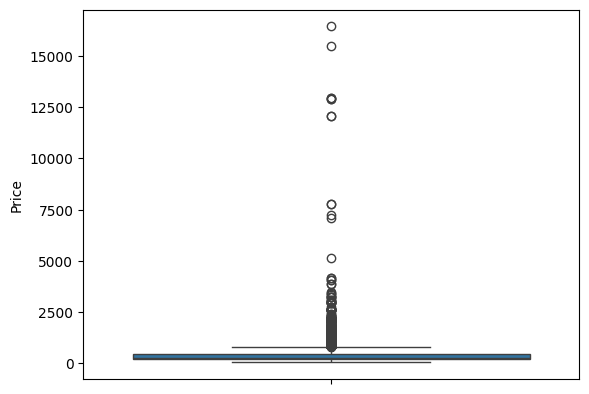

In [8]:
sns.boxplot(df['Price'])

From the boxplot, we can see that there are quite amount of outliers. This may due to the dataset contain of multiple subpopulations with different characteristics such as combining luxury and budget airbnb listing prices. Therefore, we will remove it in order to get a clearer visualization and it may improve the model performance.

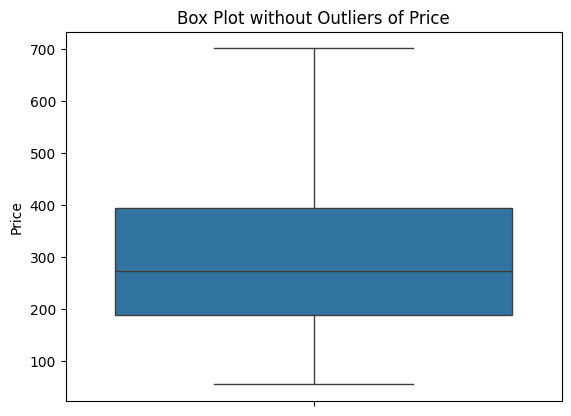

In [14]:
def removal_box_plot(df, column, threshold):
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 702
 
no_outliers = removal_box_plot(df, 'Price', threshold_value)

After we remove the outliers, we will check the correlation of each features against with the target variable.

In [16]:
df_corr=df.copy()

In [17]:
df_corr = df_corr[df_corr['Price'] <= 702]

In [18]:
# Convert Category Variable to Numeric Code
df_corr['City'] = df_corr['City'].astype('category').cat.codes

mapper = {'Entire home/apt': 2, 'Private room': 1, 'Shared room': 0}
df_corr['room_type'] = df_corr['room_type'].map(mapper)


By using mapping method, O = Shared room, 1 = Private room, 2 = Entire home/apt .

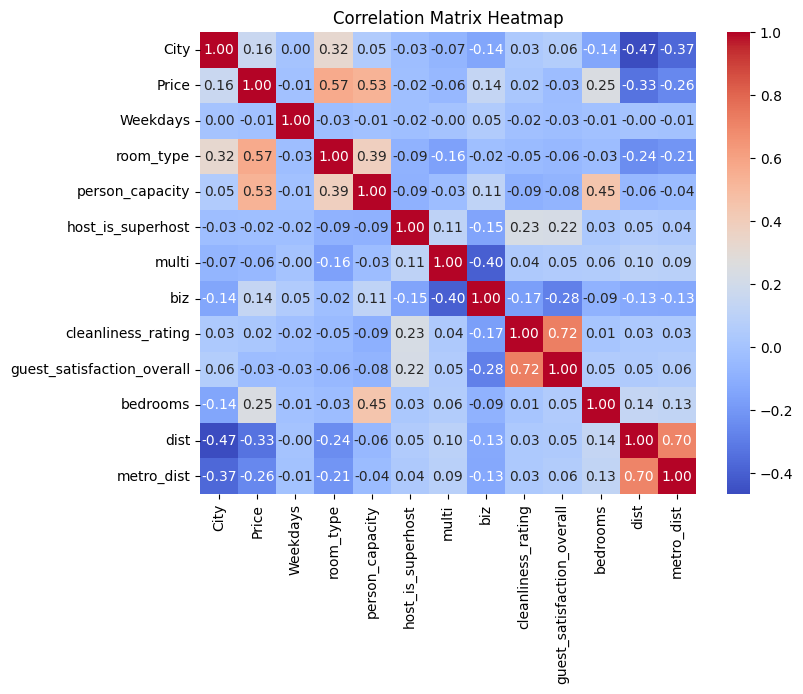

In [19]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

From the heatmap above, we observed that some of the features against Price have nearly to zero correlation, therefore, we will drop the features for those correlation which are lower than 0.2 as if the correlation is between 0.0 to 0.2, is known as week correalation to no correlation.

In [20]:
df_corr = df_corr.drop(columns=['City','Weekdays','host_is_superhost','multi','biz','guest_satisfaction_overall','cleanliness_rating'])

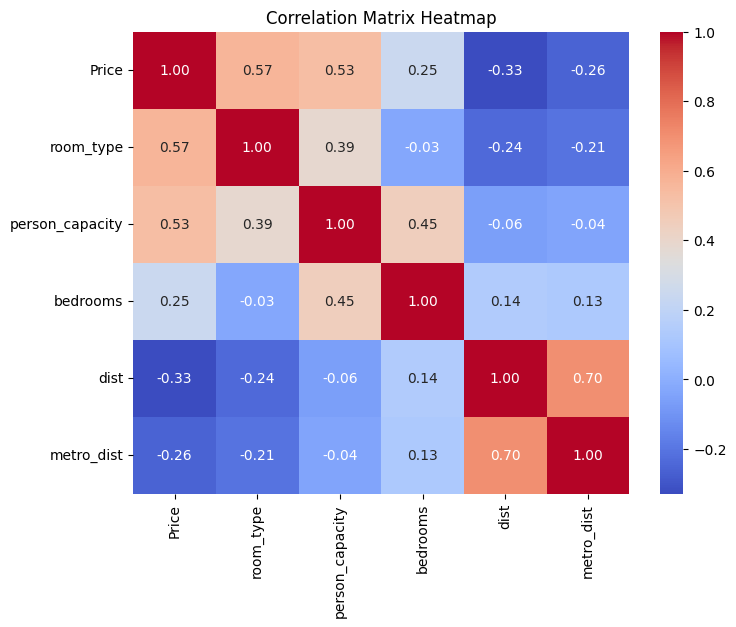

In [21]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Before proceed to visualisation, let's see is there any outliers for each features against out target variable.

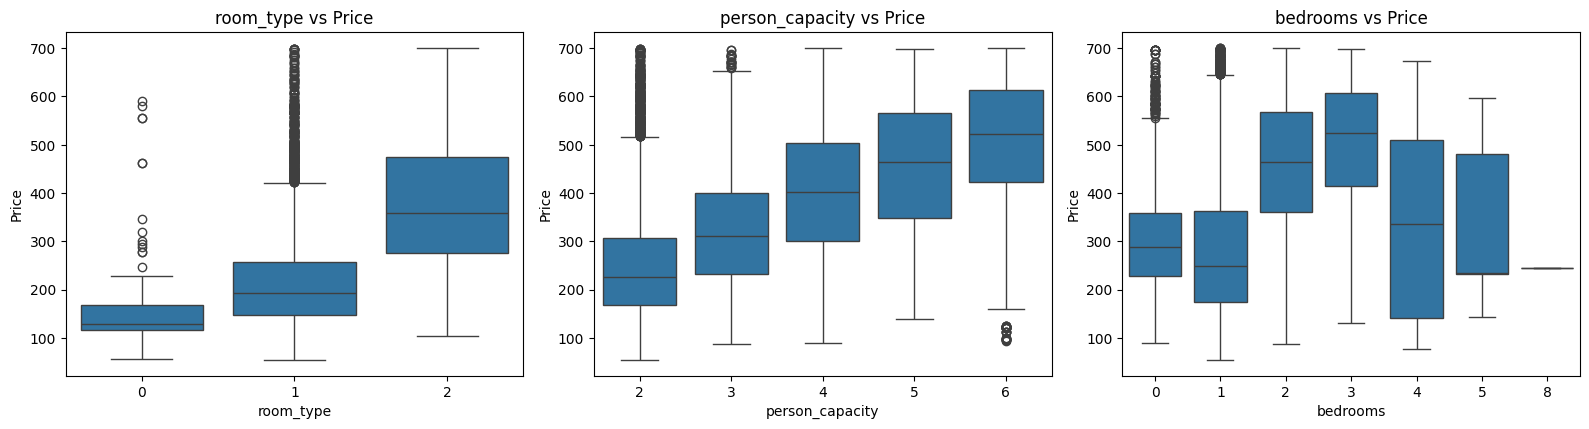

In [22]:
def plot_features_against_price(df_corr, target='Price'):
    cols = [col for col in df_corr.columns if col not in [target, 'dist', 'metro_dist']]
    plt.figure(figsize=(16, 12))
    
    for i, col in enumerate(cols, start=1):
            plt.subplot(3, 3, i)
            sns.boxplot(x=df_corr[col], y=df_corr[target])
            plt.title(f'{col} vs {target}')
        
    plt.tight_layout()
    plt.show()
plot_features_against_price(df_corr, target='Price')

We can still see there's some outliers for each features against price, it may due to the other features such as distance from city centre and metro station may affect the price too. Therefore, we will not remove it. Now, let's visualize it.

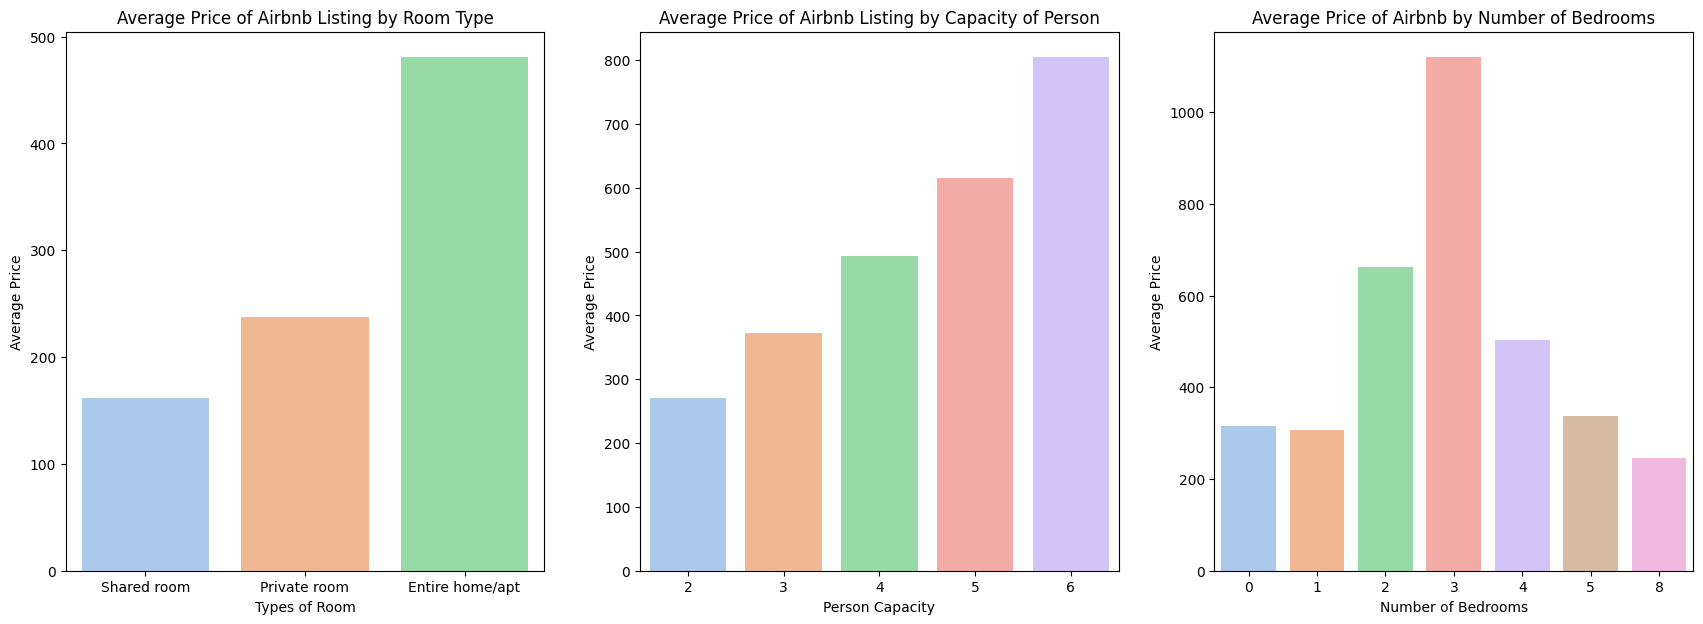

In [23]:
fig,(ax_1, ax_2, ax_3) = plt.subplots(1, 3, figsize=(21, 7))

# 1st Subplot: Average Price by Room Type
sns.barplot(x='room_type', y='Price', hue='room_type', data=df, estimator=np.mean, palette='pastel', errorbar=None,ax=ax_1)
ax_1.set_title('Average Price of Airbnb Listing by Room Type')
ax_1.set_xlabel('Types of Room')
ax_1.set_ylabel('Average Price')

# 2nd Subplot: Average Price by Capacity of Person 
sns.barplot(x='person_capacity', y='Price',hue='person_capacity', data=df,estimator=np.mean, palette='pastel', errorbar=None, ax=ax_2)
ax_2.set_title('Average Price of Airbnb Listing by Capacity of Person')
ax_2.set_xlabel('Person Capacity')
ax_2.set_ylabel('Average Price')
ax_2.legend().remove()

sns.barplot(x='bedrooms', y='Price',hue='bedrooms', data=df,estimator=np.mean, palette='pastel', errorbar=None, ax=ax_3)
ax_3.set_title('Average Price of Airbnb by Number of Bedrooms')
ax_3.set_xlabel('Number of Bedrooms')
ax_3.set_ylabel('Average Price')
ax_3.legend().remove()

From the barplot of the average price by the number bedrooms, there is a noticeable trend where the average price increases with the number of bedrooms up to 3 bedrooms. After that, the average price decreases for listings with more than 3 bedrooms.
Anomaly: The average price for listings with 8 bedrooms is surprisingly low compared to other categories. This could indicate a data anomaly such as the distance of the airbnb from the city centre and metro station. We will visualize it in scatterplot.

Text(0, 0.5, 'Price')

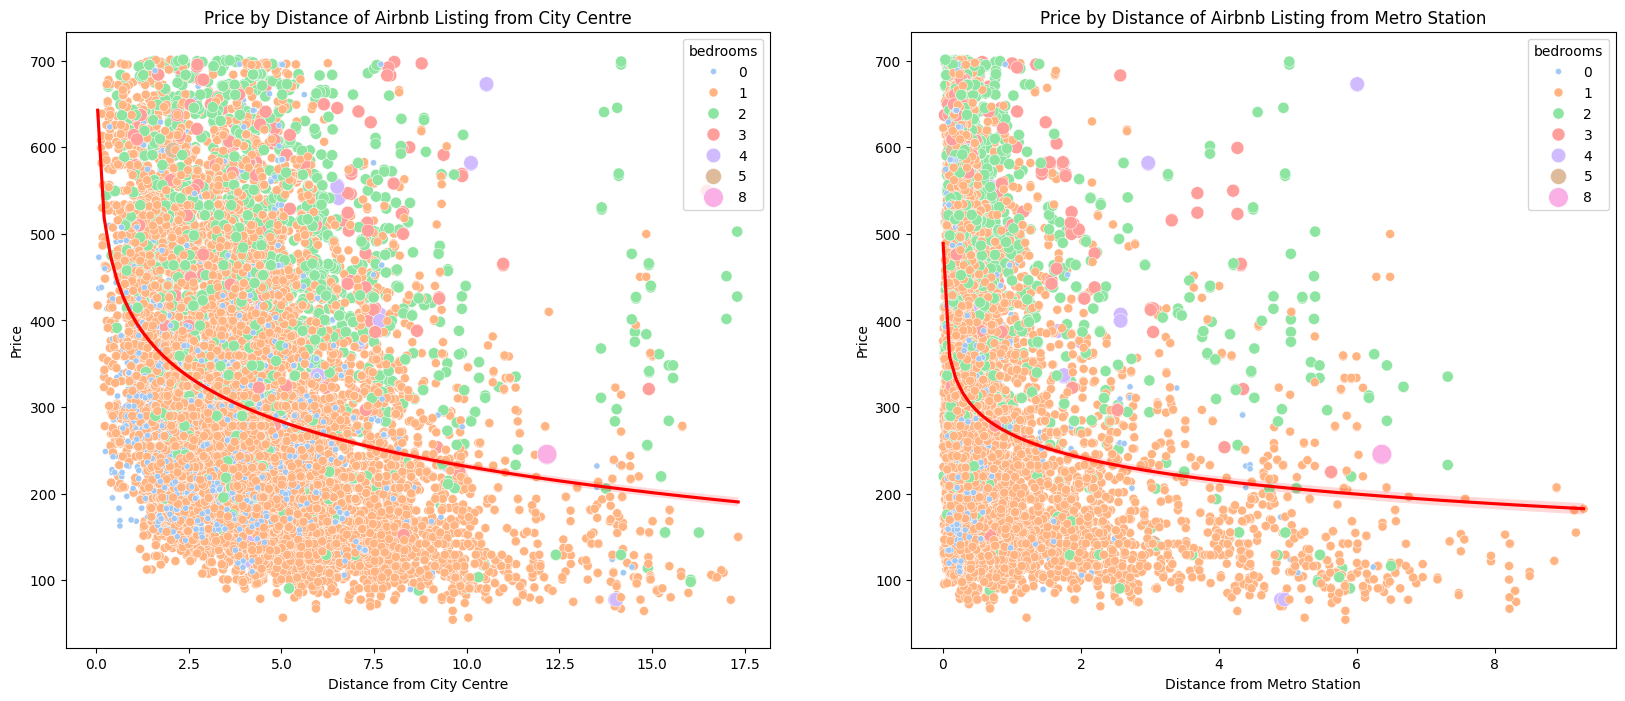

In [31]:
fig,(ax_4,ax_5) = plt.subplots(1, 2, figsize=(20, 8))

# 1st subplot: Price by the Distance of Airbnb from City Centre
sns.scatterplot(data=df_corr, x='dist', y='Price', hue="bedrooms",size="bedrooms",palette='pastel', sizes=(20, 200), legend="full",ax=ax_4)
sns.regplot(data=df_corr, x='dist', y='Price', scatter=False, ax=ax_4, color='red', logx=True)
ax_4.set_title('Price by Distance of Airbnb Listing from City Centre')
ax_4.set_xlabel('Distance from City Centre')
ax_4.set_ylabel('Price')

# 2nd subplot: Price by the Distance of Airbnb from Metro Station
sns.scatterplot(data=df_corr, x='metro_dist', y='Price', hue="bedrooms",size="bedrooms",palette='pastel', sizes=(20, 200), legend="full",ax=ax_5)
sns.regplot(data=df_corr, x='metro_dist', y='Price', scatter=False, ax=ax_5, color='red', logx=True)
ax_5.set_title('Price by Distance of Airbnb Listing from Metro Station')
ax_5.set_xlabel('Distance from Metro Station')
ax_5.set_ylabel('Price') 

From the scatter plot, there's also few of the outliers. But overall we can see a negative correlation between price with the distance from city centre and metro stattion. Instead, we can also observed that the price of airbnb which have more than 4 bedrooms are lower due to the distance from city centre and metro distance is longer.